In [1]:
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# %matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# opening dataset
airbnb = pd.read_csv('../data/AB_NYC_2019.csv', sep=',', decimal='.')

### Examining of data structure and features

In [106]:
airbnb.head(3)

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   

   name_length  price_scores  price_anomaly  
0           34      0.110031              1  
1           21      0.104698              1  
2           35      0.145405              1

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# amount of null values per column
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# finding duplicated values
airbnb.duplicated().sum()

0

In [7]:
# listing name column
airbnb['name_length'] = airbnb['name'].map(str).apply(len)
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   name_length  
0           34  
1           21  
2           35  
3           31  
4           48

In [8]:
# removing sensitive (eg. name, document) or non relevant data
airbnb.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
print(airbnb.columns)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_length'],
      dtype='object')


In [9]:
# replacing null valeus of "reviews_per_month" by zero
airbnb['reviews_per_month'].fillna(0, inplace=True)

# checking
airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
name_length                       0
dtype: int64

## Categorical data
### - Host info

In [10]:
# max listing by the same host
airbnb['calculated_host_listings_count'].max()

327

In [11]:
print('number of unique host: ', len(airbnb['host_id'].unique()))
airbnb['host_id'].value_counts()

number of unique host:  37457


219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

### - Neighbourhood info

In [12]:
# number of neighbourhood groups in ascending order of quantity
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [13]:
# number of different neighbourhood
len(airbnb['neighbourhood'].unique())

221

### - Room type info

In [14]:
# number of room types in ascending order of quantity
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

## Numerical data

In [15]:
airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
        'calculated_host_listings_count', 'availability_365', 'name_length']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000    48895.000000       48895.000000       48895.000000   
mean     152.720687        7.029962          23.274466           1.090910   
std      240.154170       20.510550          44.550582           1.597283   
min        0.000000        1.000000           0.000000           0.000000   
25%       69.000000        1.000000           1.000000           0.040000   
50%      106.000000        3.000000           5.000000           0.370000   
75%      175.000000        5.000000          24.000000           1.580000   
max    10000.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365   name_length  
count                    48895.000000      48895.000000  48895.000000  
mean                         7.143982        112.781327     36.900051  
std                         32.952519        131.622289     10.507731  
min                          1.000000          0.000000      1.000000  
25%                          1.000000          0.000000     31.000000  
50%                          1.000000         45.000000     36.000000  
75%                          2.000000        227.000000     46.000000  
max                        327.000000        365.000000    179.000000

### Searching for wrong data:
- max price of 10000 dolars one night?
- min price of 0 dolars?
- max nights of 1.250 days?
- min zero days available in the year?

Later we will need to work in these problems

In [16]:
# Price by room type
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,6))

sns.boxplot(data=airbnb, x='room_type', y='price',
            palette='viridis', ax=ax1).set_title('ALL DATA')
sns.boxplot(data=airbnb.loc[airbnb['price'] < 600], x='room_type', y='price',
            palette='viridis', ax=ax2).set_title('PRICES < $600');

#TODO: clean outliers - remove or replace?

In [17]:
# Price distribution
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,4))

sns.histplot(airbnb, x='price', hue='room_type', ax=ax1)
sns.histplot(airbnb.loc[airbnb['price'] < 600], x='price', hue='room_type', ax=ax2);

In [18]:
# Price x Neighbourhood Group
g = sns.FacetGrid(airbnb.loc[airbnb['price'] < 600], col='neighbourhood_group', col_wrap=3, height=3, aspect=1.5)
g.map_dataframe(sns.histplot, x='price', hue='room_type');

In [19]:
# Minimum nights by room type
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(15,5))
ax3.set_yscale("log")

sns.boxplot(data=airbnb, x='room_type', y='minimum_nights',
            palette='viridis', ax=ax1).set_title('ALL DATA')
sns.boxplot(data=airbnb.loc[airbnb['minimum_nights'] < 60], x='room_type', y='minimum_nights',
            palette='viridis', ax=ax2).set_title('MINIMUM NIGHTS < 60')
sns.boxplot(data=airbnb.loc[airbnb['minimum_nights'] < 60], x='room_type', y='minimum_nights',
            palette='viridis', ax=ax3).set_title('MINIMUM NIGHTS < 60 - log');

#TODO: clean outliers - remove or replace?

___
## Data Cleaning
There are many ways to remove outliers and here we will choose these approach to enhance the dataset quality

### price
- Isolation Forest - from scikit-learn - to identify outliers

### minimum nights
- remove values > 60 days

### availability_365
- remove values == 0 days

#### * First: identify the amount of data to be removed, whether or not they are representative of the data set

___
## Price

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
# isolate price column
airbnb[['price']].head()

price
0    149
1    225
2    150
3     89
4     80

### Isolation Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

Unsupervised learning algorithm, based on the Decision Tree algorithm, that identifies anomaly by isolating outliers in the data.

Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.


In [22]:
# Model settings:
# n_estimators: number of base estimators in the ensemble - number of trees built in the forest 
# max_samples: all values will be used for all trees (no sampling)
# contamination: the proportion of outliers in the data set, defines the threshold on the anomaly_scores
# in our dataset: ~2% values too hight or too low
model = IsolationForest(n_estimators=100, max_samples=50000, contamination=0.02)
model.fit(airbnb[['price']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.02,
                max_features=1.0, max_samples=50000, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [23]:
# output of anomaly detection:
# price_scores - anomaly score each value.
airbnb['price_scores'] = model.decision_function(airbnb[['price']])

# price_anomaly - pediction of each value, if it is an outlier or not. +1: not outlier; -1: outlier
airbnb['price_anomaly'] = model.predict(airbnb[['price']])

In [24]:
# checking high values
airbnb.loc[airbnb['price'] > 9000]

host_id neighbourhood_group    neighbourhood  latitude  longitude  \
6530    1235070           Manhattan      East Harlem  40.79264  -73.93898   
9151   20582832              Queens          Astoria  40.76810  -73.91651   
12342   3906464           Manhattan  Lower East Side  40.71355  -73.98507   
17692   5143901            Brooklyn       Greenpoint  40.73260  -73.95739   
29238  72390391           Manhattan  Upper West Side  40.77213  -73.98665   
40433   4382127           Manhattan  Lower East Side  40.71980  -73.98566   

             room_type  price  minimum_nights  number_of_reviews  \
6530   Entire home/apt   9999               5                  1   
9151      Private room  10000             100                  2   
12342     Private room   9999              99                  6   
17692  Entire home/apt  10000               5                  5   
29238  Entire home/apt  10000              30                  0   
40433  Entire home/apt   9999              30                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
6530                0.02                               1                 0   
9151                0.04                               1                 0   
12342               0.14                               1                83   
17692               0.16                               1                 0   
29238               0.00                               1                83   
40433               0.00                               1               365   

       name_length  price_scores  price_anomaly  
6530            18     -0.317952             -1  
9151            35     -0.317952             -1  
12342           35     -0.317952             -1  
17692           47     -0.317952             -1  
29238           19     -0.317952             -1  
40433           50     -0.317952             -1

In [25]:
# checking low values
airbnb.loc[airbnb['price'] < 10]

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
23161    8993084            Brooklyn  Bedford-Stuyvesant  40.69023  -73.95428   
25433  131697576               Bronx     East Morrisania  40.83296  -73.88668   
25634   15787004            Brooklyn            Bushwick  40.69467  -73.92433   
25753    1641537            Brooklyn          Greenpoint  40.72462  -73.94072   
25778   10132166            Brooklyn        Williamsburg  40.70838  -73.94645   
25794   86327101            Brooklyn  Bedford-Stuyvesant  40.68173  -73.91342   
25795   86327101            Brooklyn  Bedford-Stuyvesant  40.68279  -73.91170   
25796   86327101            Brooklyn  Bedford-Stuyvesant  40.68258  -73.91284   
26259   13709292           Manhattan         Murray Hill  40.75091  -73.97597   
26841  101970559            Brooklyn            Bushwick  40.69211  -73.90670   
26866  101970559            Brooklyn            Bushwick  40.69166  -73.90928   

             room_type  price  minimum_nights  number_of_reviews  \
23161     Private room      0               4                  1   
25433     Private room      0               2                 55   
25634     Private room      0               2                 16   
25753     Private room      0               2                 12   
25778  Entire home/apt      0               5                  3   
25794     Private room      0               1                 93   
25795     Private room      0               1                 95   
25796     Private room      0               1                 95   
26259  Entire home/apt      0               3                  0   
26841      Shared room      0              30                  2   
26866      Shared room      0              30                  5   

       reviews_per_month  calculated_host_listings_count  availability_365  \
23161               0.05                               4                28   
25433               2.56                               4               127   
25634               0.71                               5                 0   
25753               0.53                               2                 0   
25778               0.15                               1                73   
25794               4.28                               6               176   
25795               4.37                               6               232   
25796               4.35                               6               222   
26259               0.00                               1                 0   
26841               0.11                               6               333   
26866               0.26                               6               139   

       name_length  price_scores  price_anomaly  
23161           49       -0.1439             -1  
25433           45       -0.1439             -1  
25634           47       -0.1439             -1  
25753           31       -0.1439             -1  
25778           45       -0.1439             -1  
25794           50       -0.1439             -1  
25795           49       -0.1439             -1  
25796           44       -0.1439             -1  
26259           21       -0.1439             -1  
26841           49       -0.1439             -1  
26866           38       -0.1439             -1

In [26]:
# amount of price outliers
complete = len(airbnb)
anomaly_p = len(airbnb.loc[airbnb['price_anomaly'] == -1])
print('anomaly detection of price values: ', round((anomaly_p/complete)*100,4), '%')

anomaly detection of price values:  1.9982 %


In [27]:
# In this case, it was chosen to remove the outlier values, with the possibility of also removing false positives
# identified by the Isolation Forest. There could be other ways of working with this data.
airbnb_clean = airbnb.loc[airbnb['price_anomaly'] == 1]

# removing new columns (anomaly detection)
airbnb_clean.drop(['price_scores','price_anomaly'], axis=1, inplace=True)
airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47918 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         47918 non-null  int64  
 1   neighbourhood_group             47918 non-null  object 
 2   neighbourhood                   47918 non-null  object 
 3   latitude                        47918 non-null  float64
 4   longitude                       47918 non-null  float64
 5   room_type                       47918 non-null  object 
 6   price                           47918 non-null  int64  
 7   minimum_nights                  47918 non-null  int64  
 8   number_of_reviews               47918 non-null  int64  
 9   reviews_per_month               47918 non-null  float64
 10  calculated_host_listings_count  47918 non-null  int64  
 11  availability_365                47918 non-null  int64  
 12  name_length                     

___
## minimum_nights

In [28]:
# amount of minimum_nights outliers - values > 60 days
complete = len(airbnb_clean)
anomaly_n = len(airbnb_clean.loc[(airbnb_clean['minimum_nights'] > 60)])
print('anomaly detection of minimum nights values: ', round((anomaly_n/complete)*100,4), '%')

anomaly detection of minimum nights values:  0.6428 %


In [29]:
# In this case, it was chosen to remove the outlier values. There could be other ways of working with this data.
airbnb_clean = airbnb_clean.loc[airbnb_clean['minimum_nights'] <= 60]
airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47610 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         47610 non-null  int64  
 1   neighbourhood_group             47610 non-null  object 
 2   neighbourhood                   47610 non-null  object 
 3   latitude                        47610 non-null  float64
 4   longitude                       47610 non-null  float64
 5   room_type                       47610 non-null  object 
 6   price                           47610 non-null  int64  
 7   minimum_nights                  47610 non-null  int64  
 8   number_of_reviews               47610 non-null  int64  
 9   reviews_per_month               47610 non-null  float64
 10  calculated_host_listings_count  47610 non-null  int64  
 11  availability_365                47610 non-null  int64  
 12  name_length                     

___
## availability_365

In [30]:
# amount of availability_365 outliers - values = 0 days
complete = len(airbnb_clean)
anomaly_a = len(airbnb_clean.loc[(airbnb['availability_365'] == 0)])
print(anomaly_a)
print('anomaly detection of minimum nights values: ', round((anomaly_a/complete)*100,4), '%')

17279
anomaly detection of minimum nights values:  36.2928 %


#### Why so many data with 0 days available?
- hypothesis: Those places were already rented on the date the dataset was generated? Users have suspended the ad on the platform?
- Because the amount of data is representative in this case, and may not represent an outlier, we will not remove them

___

In [31]:
# New distribution after Data Cleaning
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,4))

sns.histplot(airbnb_clean, x='price', hue='room_type', hue_order=['Shared room', 'Entire home/apt', 'Private room'],
             ax=ax1).set_title('PRICE')
sns.histplot(airbnb_clean, x='minimum_nights', hue='room_type', hue_order=['Shared room', 'Entire home/apt', 'Private room'],
             ax=ax2).set_title('MINIMUM NIGHTS');

## Prediction

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [33]:
airbnb_clean.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_length'],
      dtype='object')

In [108]:
airbnb_clean.to_csv('../data/airbnb_clean.csv', sep=';', decimal=',', encoding='utf-8')

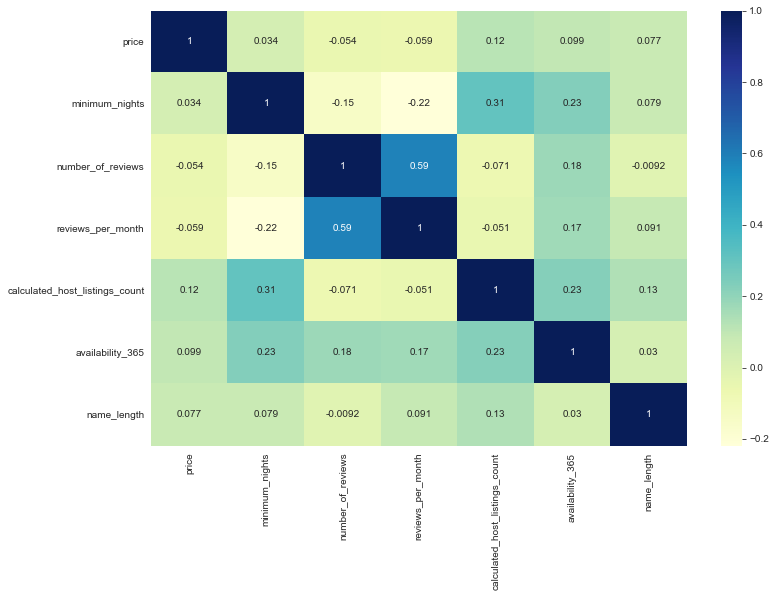

In [34]:
# Plotting correlation matrix - numeric values
data = airbnb_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
                     'availability_365', 'name_length']]

corr = data.corr(method='pearson')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [36]:
airbnb_new = airbnb_clean[[ 'neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'name_length']]
airbnb_new.head()

neighbourhood_group        room_type  price  minimum_nights  \
0            Brooklyn     Private room    149               1   
1           Manhattan  Entire home/apt    225               1   
2           Manhattan     Private room    150               3   
3            Brooklyn  Entire home/apt     89               1   
4           Manhattan  Entire home/apt     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0               0.00                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  name_length  
0               365           34  
1               355           21  
2               365           35  
3               194           31  
4                 0           48

In [37]:
data = airbnb_new.loc[airbnb_new['neighbourhood_group'] == 'Manhattan']
sns.pairplot(data, hue='room_type')

### Analysis

Columns reviews_of_views and reviews_per_months have the highest correlation, since in this case they correspond to the same information. 

In order to avoid collinearity, in this model we will use only the review_per_month values.

In [38]:
# Dataset for prediction

airbnb_pred = airbnb_clean[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'reviews_per_month',
                      'availability_365', 'calculated_host_listings_count', 'name_length']]

airbnb_pred.dtypes

neighbourhood_group                object
room_type                          object
price                               int64
minimum_nights                      int64
reviews_per_month                 float64
availability_365                    int64
calculated_host_listings_count      int64
name_length                         int64
dtype: object

In [39]:
# Creating dummies for cathegorical data: neighbouthood_group and room_type
airbnb_pred2 = pd.get_dummies(airbnb_pred, columns=['neighbourhood_group','room_type'], prefix = ['ngh','rty'], drop_first=False)
airbnb_pred2.head()

price  minimum_nights  reviews_per_month  availability_365  \
0    149               1               0.21               365   
1    225               1               0.38               355   
2    150               3               0.00               365   
3     89               1               4.64               194   
4     80              10               0.10                 0   

   calculated_host_listings_count  name_length  ngh_Bronx  ngh_Brooklyn  \
0                               6           34          0             1   
1                               2           21          0             0   
2                               1           35          0             0   
3                               1           31          0             1   
4                               1           48          0             0   

   ngh_Manhattan  ngh_Queens  ngh_Staten Island  rty_Entire home/apt  \
0              0           0                  0                    0   
1              1           0                  0                    1   
2              1           0                  0                    0   
3              0           0                  0                    1   
4              1           0                  0                    1   

   rty_Private room  rty_Shared room  
0                 1                0  
1                 0                0  
2                 1                0  
3                 0                0  
4                 0                0

In [40]:
airbnb_pred2.shape

(47610, 14)

In [41]:
# Independent variables - neighbourhood_group', 'room_type', 'minimum_nights', 'reviews_per_month',
## 'calculated_host_listings_count', 'availability_365'

X = airbnb_pred2.drop(['price'], axis=1)

# Dependent variable - 'price'

Y = airbnb_pred2['price']

In [42]:
X.head()

minimum_nights  reviews_per_month  availability_365  \
0               1               0.21               365   
1               1               0.38               355   
2               3               0.00               365   
3               1               4.64               194   
4              10               0.10                 0   

   calculated_host_listings_count  name_length  ngh_Bronx  ngh_Brooklyn  \
0                               6           34          0             1   
1                               2           21          0             0   
2                               1           35          0             0   
3                               1           31          0             1   
4                               1           48          0             0   

   ngh_Manhattan  ngh_Queens  ngh_Staten Island  rty_Entire home/apt  \
0              0           0                  0                    0   
1              1           0                  0                    1   
2              1           0                  0                    0   
3              0           0                  0                    1   
4              1           0                  0                    1   

   rty_Private room  rty_Shared room  
0                 1                0  
1                 0                0  
2                 1                0  
3                 0                0  
4                 0                0

In [48]:
Y.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [43]:
#Split dataset into Train (80% - 38.088) and Test (20% - 9.522)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [44]:
print('X_train: ', X_train.shape)
print('Y_train: ', Y_train.shape)
print('------------------------------')
print('X_test: ', X_test.shape)
print('Y_test: ', Y_test.shape)

X_train:  (38088, 13)
Y_train:  (38088,)
------------------------------
X_test:  (9522, 13)
Y_test:  (9522,)


In [78]:
## Linear Regression
reg = LinearRegression().fit(X_train, Y_train)

# Predicting 
Y_pred = reg.predict(X_test)
Y_pred

# R squared value
print('R squared value: ', reg.score(X_train, Y_train))

# Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ', rmse)

R squared value:  0.3289808823250935
RMSE:  81.47206107734748


In [84]:
## Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_leaf=.0001)

dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)

print('R squared value: ', dt.score(X_train, Y_train))

### Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ', rmse)

R squared value:  0.6390258889250643
RMSE:  91.79594038451852


In [104]:
# prediction examples:

for i in range(20,24):
    print('real: ', Y_test.iloc[i])
    print('prediction: ', Y_pred[i].round(2))

real:  260
prediction:  169.75
real:  179
prediction:  116.25
real:  54
prediction:  60.4
real:  150
prediction:  132.17


---
### airbnb data in __kepler.gl__
<img src="../image/kepler.jpg">